In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [3]:
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned_reviews.csv", index_col=0)
df.head()

reviews  stars        date  \
0  Not Verified |   Had to cancel my flight month...      5  2024-07-01   
1  ✅ Trip Verified | Flight cancelled with no rea...      1  2024-06-30   
2  ✅ Trip Verified | This is a route I fly regula...      1  2024-06-26   
3  ✅ Trip Verified |  While BA may have made some...      6  2024-06-23   
4  ✅ Trip Verified | British Airways new Club Sui...      3  2024-06-23   

          country  verified                                             corpus  
0          Canada     False  verified | cancel flight month advance due cha...  
1  United Kingdom      True  flight cancelled reason given le 24 h departur...  
2  United Kingdom      True  route fly regularly. used first class security...  
3          Canada      True  ba may made positive improvement club world pr...  
4          Canada      True  british airway new club suite marked improveme...

In [4]:
df['stars'].mean()

4.600057175528874

In [5]:
df.verified.value_counts()

verified
False    2254
True     1244
Name: count, dtype: int64

In [6]:
df['country'].unique()

array(['Canada', 'United Kingdom', 'United States', 'Austria',
       'South Africa', 'Italy', 'Denmark', 'Singapore', 'Netherlands',
       'Belgium', 'Australia', 'Nigeria', 'Japan', 'Ukraine', 'Germany',
       'Ireland', 'Spain', 'China', 'Ecuador', 'Switzerland', 'Romania',
       'France', 'Kuwait', 'Iceland', 'Poland', 'Hong Kong', 'Qatar',
       'Greece', 'Senegal', 'United Arab Emirates', 'Cyprus', 'Chile',
       'Sweden', 'India', 'New Zealand', 'Czech Republic', 'Malaysia',
       'Ghana', 'Bermuda', 'Botswana', 'Brazil', 'Panama',
       'Russian Federation', 'Philippines', 'Bulgaria', 'Thailand',
       'Argentina', 'Mexico', 'Saint Kitts and Nevis', 'Vietnam',
       'Norway', 'Jordan', 'Taiwan', 'Slovakia', 'Israel', 'South Korea',
       'Saudi Arabia', 'Hungary', 'Portugal', 'Cayman Islands',
       'Costa Rica', 'Egypt', 'Laos', 'Turkey', 'Indonesia', 'Bahrain',
       'Dominican Republic', 'Luxembourg', 'Finland', 'Trinidad & Tobago'],
      dtype=object)

In [7]:
df.country.value_counts()

country
United Kingdom           2174
United States             407
Australia                 142
Canada                    111
Germany                    64
                         ... 
Chile                       1
Ecuador                     1
Senegal                     1
Saint Kitts and Nevis       1
Trinidad & Tobago           1
Name: count, Length: 70, dtype: int64

In [8]:
df['country'].unique().shape

(70,)

C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


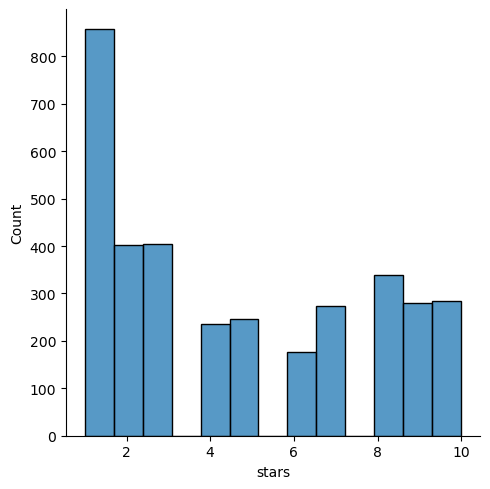

In [9]:
sns.displot(df['stars'])
plt.show()

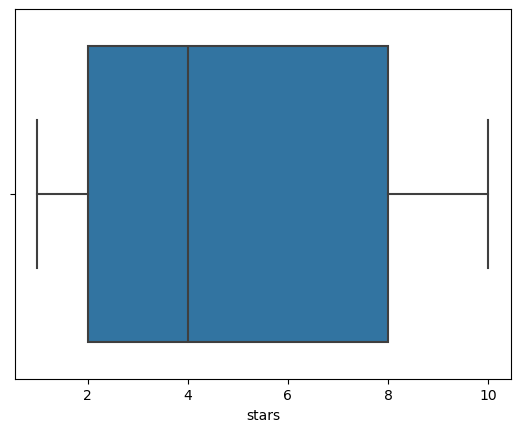

<Figure size 300x400 with 0 Axes>

<Figure size 300x400 with 0 Axes>

In [10]:
sns.boxplot(x='stars', data=df)
plt.show()
plt.figure(figsize=(3,4))

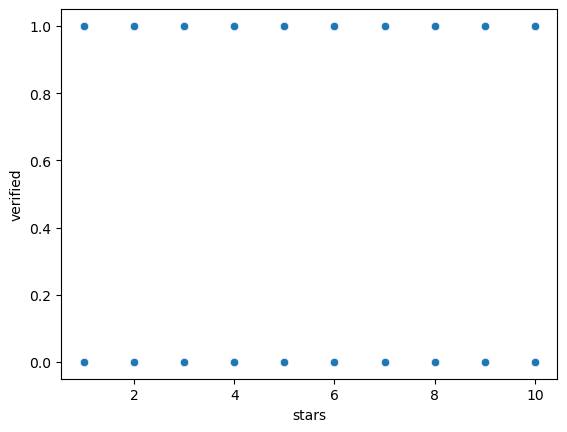

<Figure size 5000x5000 with 0 Axes>

In [11]:
sns.scatterplot(x='stars', y='verified',data=df)
plt.figure(figsize=(50,50))
plt.show()

C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=de

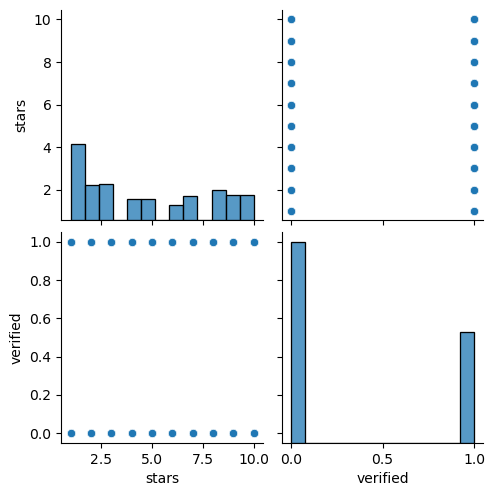

In [12]:
sns.pairplot(data=df)
plt.show()

In [13]:
df.describe()

stars
count  3498.000000
mean      4.600057
std       3.142115
min       1.000000
25%       2.000000
50%       4.000000
75%       8.000000
max      10.000000

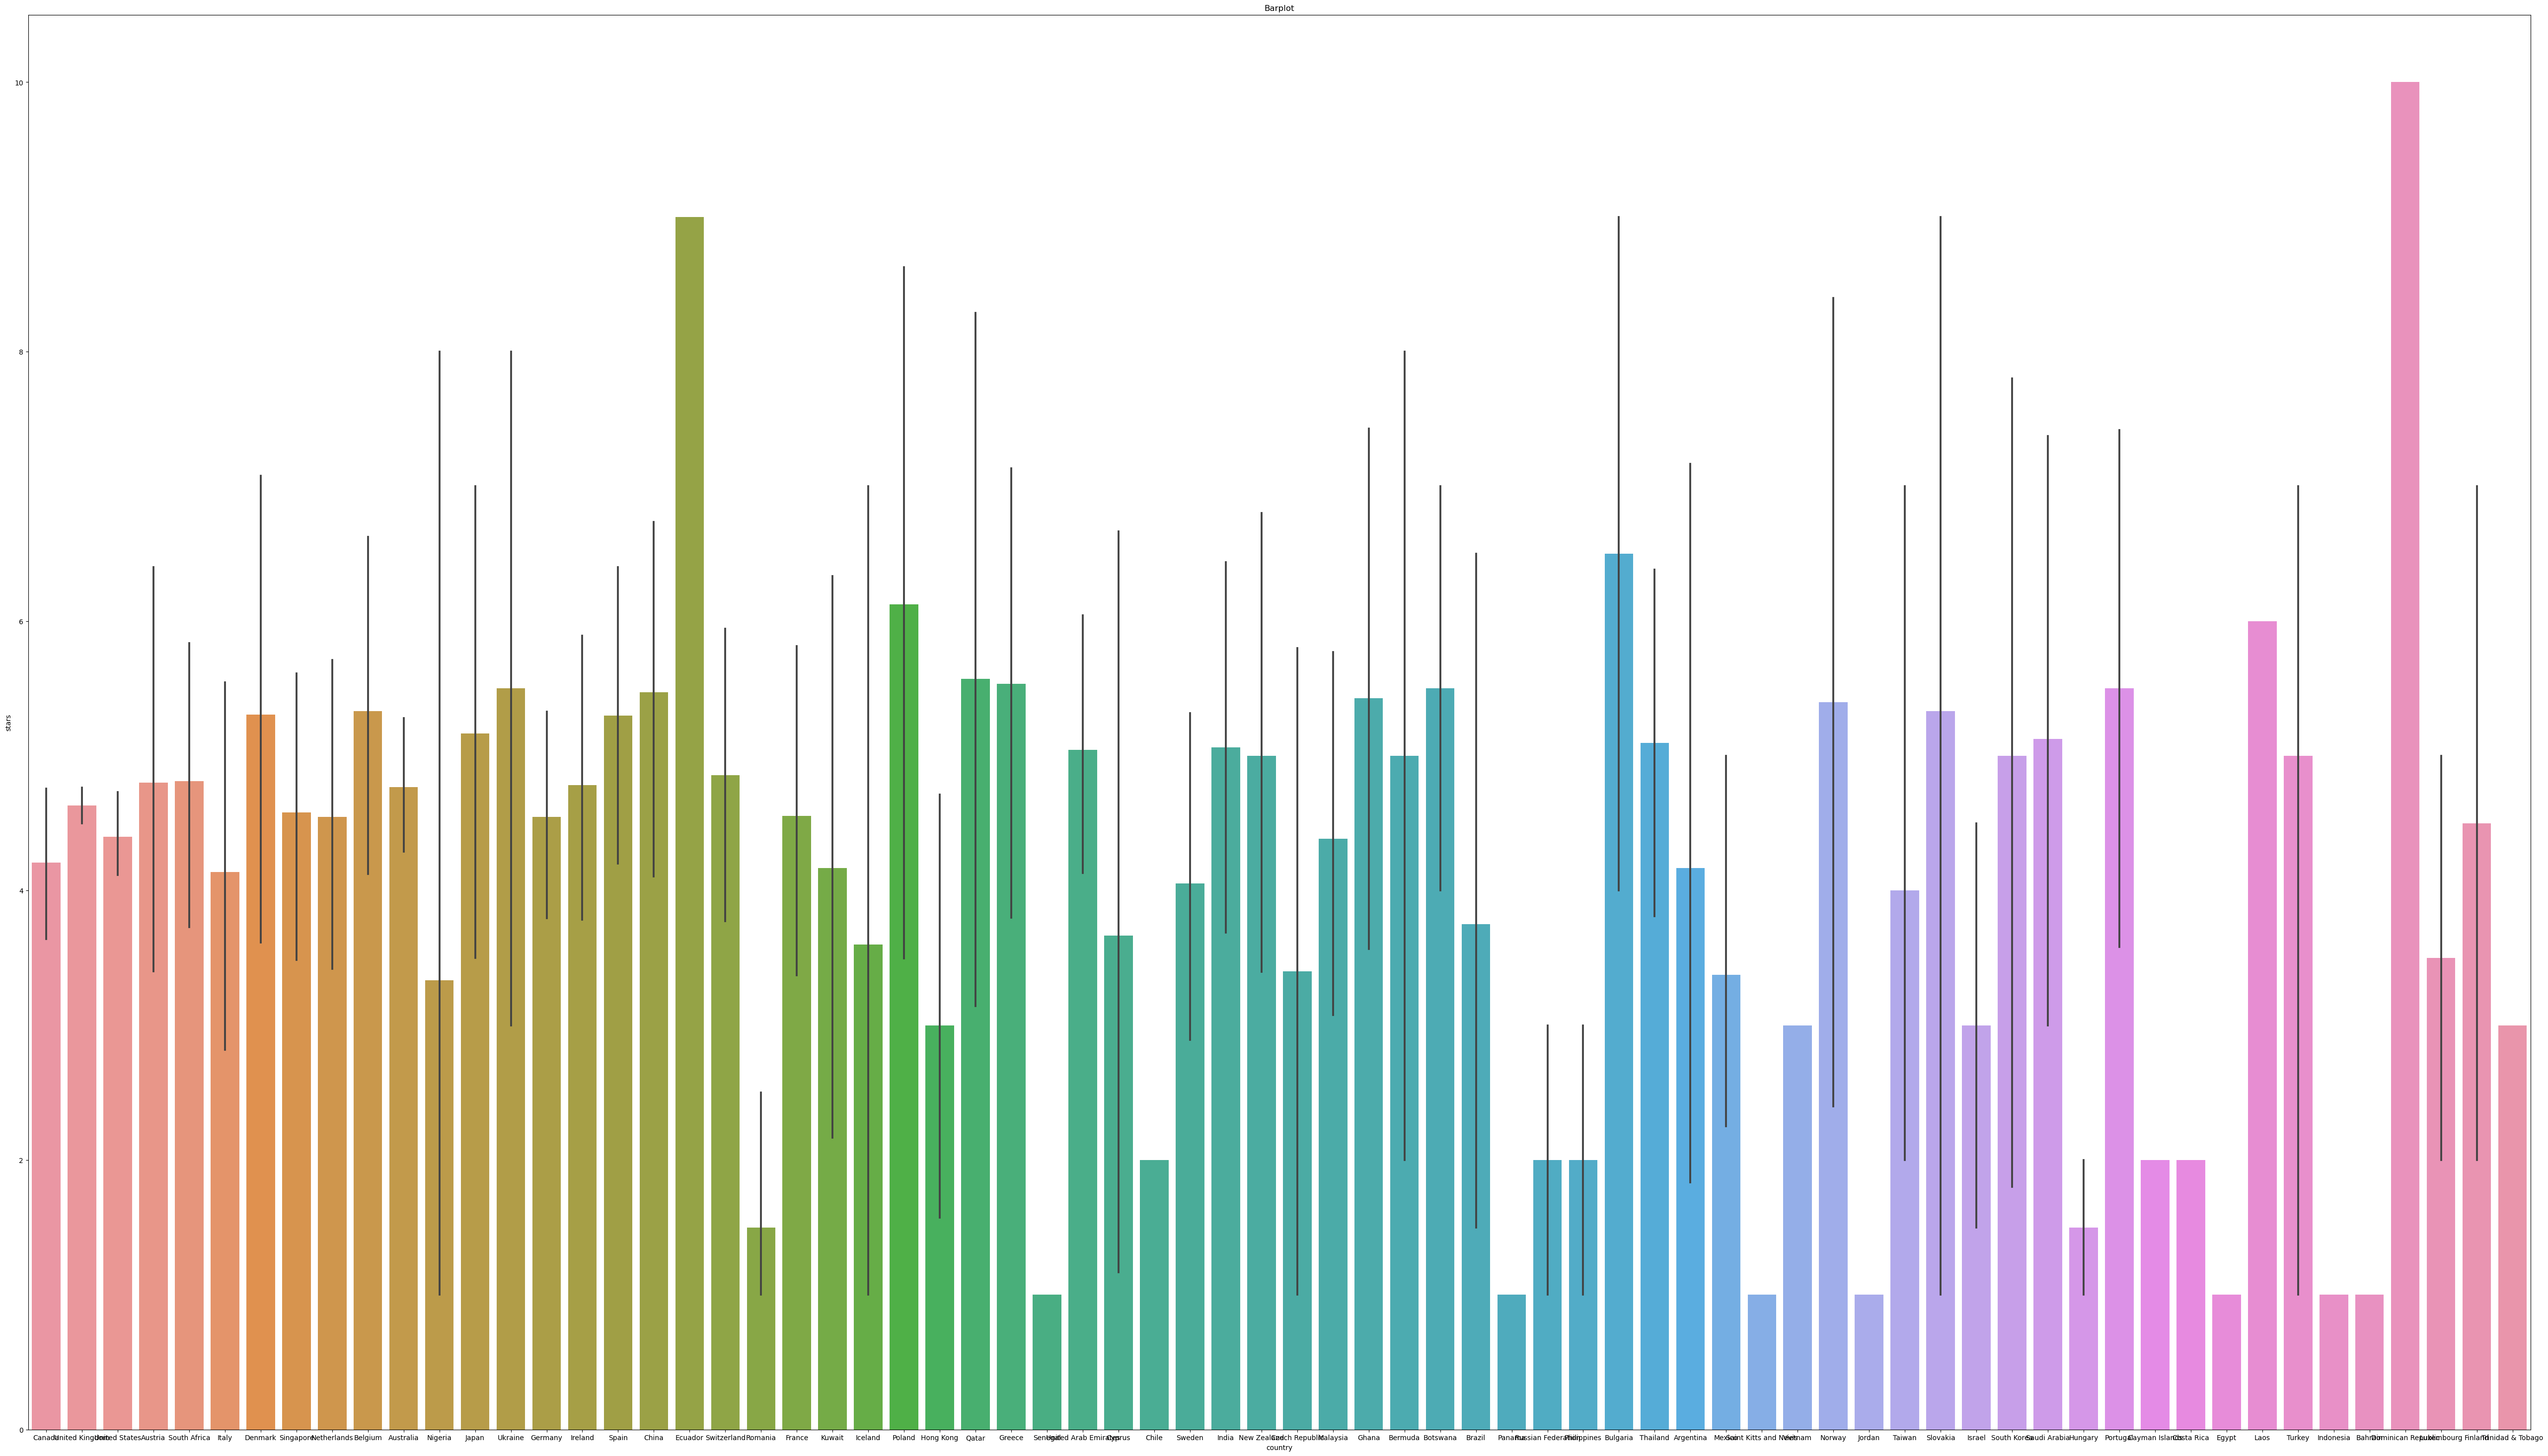

In [14]:
plt.figure(figsize=(65,37))
sns.barplot(x='country' , y='stars' , data=df)
plt.title('Barplot')
plt.xlabel('country')
plt.ylabel('stars')
plt.show()


In [15]:
df.stars.value_counts()

stars
1     857
3     405
2     402
8     339
10    284
9     280
7     273
5     246
4     235
6     177
Name: count, dtype: int64

Text(0.5, 0.98, 'Counts for each ratings')

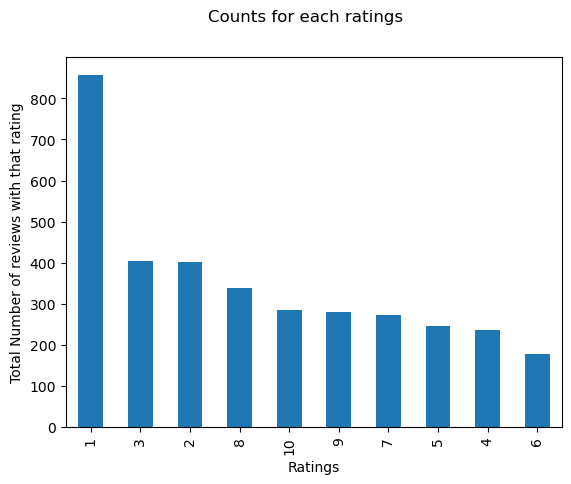

In [16]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [17]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df.stars.value_counts()/ df.stars.value_counts().sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [18]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [19]:
df_ratings.rename(columns={'count':'total_counts'}, inplace=True)

In [20]:
df_ratings

stars  total_counts  pct_values
0      1           857       24.50
1      3           405       11.58
2      2           402       11.49
3      8           339        9.69
4     10           284        8.12
5      9           280        8.00
6      7           273        7.80
7      5           246        7.03
8      4           235        6.72
9      6           177        5.06

Text(0.5, 1.0, 'Counts for each ratings')

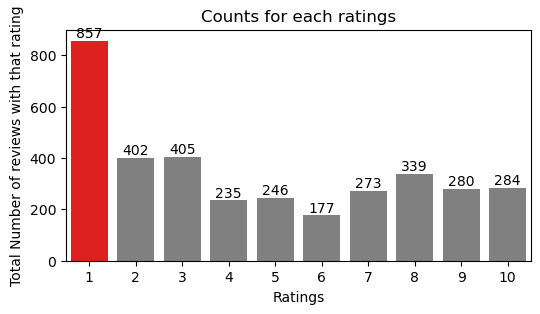

In [21]:
plt.figure(figsize=(6,3))
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")


Which country most review comes from?

In [22]:
print(f"{len(df['country'].unique()) } countries")

70 countries


In [23]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [24]:
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned_reviews.csv", index_col=0)
df.head()

reviews  stars        date  \
0  Not Verified |   Had to cancel my flight month...      5  2024-07-01   
1  ✅ Trip Verified | Flight cancelled with no rea...      1  2024-06-30   
2  ✅ Trip Verified | This is a route I fly regula...      1  2024-06-26   
3  ✅ Trip Verified |  While BA may have made some...      6  2024-06-23   
4  ✅ Trip Verified | British Airways new Club Sui...      3  2024-06-23   

          country  verified                                             corpus  
0          Canada     False  verified | cancel flight month advance due cha...  
1  United Kingdom      True  flight cancelled reason given le 24 h departur...  
2  United Kingdom      True  route fly regularly. used first class security...  
3          Canada      True  ba may made positive improvement club world pr...  
4          Canada      True  british airway new club suite marked improveme...

In [25]:
df.country.value_counts()

country
United Kingdom           2174
United States             407
Australia                 142
Canada                    111
Germany                    64
                         ... 
Chile                       1
Ecuador                     1
Senegal                     1
Saint Kitts and Nevis       1
Trinidad & Tobago           1
Name: count, Length: 70, dtype: int64

In [26]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()
df_country_review

country  count
0  United Kingdom   2174
1   United States    407
2       Australia    142
3          Canada    111
4         Germany     64

In [27]:
df_country_review.rename(columns={'count':'total_reviews'}, inplace=True)
df_country_review

country  total_reviews
0  United Kingdom           2174
1   United States            407
2       Australia            142
3          Canada            111
4         Germany             64

<Figure size 500x300 with 0 Axes>

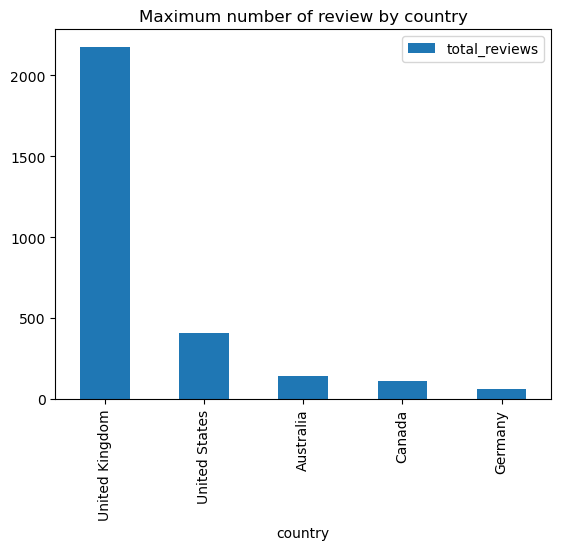

In [44]:
plt.figure(figsize=(5,3))
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")
plt.savefig('Downloads/max no of review by country')

In [29]:
df['country'].unique()               #map function encoding 

array(['Canada', 'United Kingdom', 'United States', 'Austria',
       'South Africa', 'Italy', 'Denmark', 'Singapore', 'Netherlands',
       'Belgium', 'Australia', 'Nigeria', 'Japan', 'Ukraine', 'Germany',
       'Ireland', 'Spain', 'China', 'Ecuador', 'Switzerland', 'Romania',
       'France', 'Kuwait', 'Iceland', 'Poland', 'Hong Kong', 'Qatar',
       'Greece', 'Senegal', 'United Arab Emirates', 'Cyprus', 'Chile',
       'Sweden', 'India', 'New Zealand', 'Czech Republic', 'Malaysia',
       'Ghana', 'Bermuda', 'Botswana', 'Brazil', 'Panama',
       'Russian Federation', 'Philippines', 'Bulgaria', 'Thailand',
       'Argentina', 'Mexico', 'Saint Kitts and Nevis', 'Vietnam',
       'Norway', 'Jordan', 'Taiwan', 'Slovakia', 'Israel', 'South Korea',
       'Saudi Arabia', 'Hungary', 'Portugal', 'Cayman Islands',
       'Costa Rica', 'Egypt', 'Laos', 'Turkey', 'Indonesia', 'Bahrain',
       'Dominican Republic', 'Luxembourg', 'Finland', 'Trinidad & Tobago'],
      dtype=object)

In [30]:
ord_data={'Canada':1, 'United Kingdom':2, 'United States':3, 'Austria':4,
       'South Africa':5, 'Italy':6, 'Denmark':7, 'Singapore':8, 'Netherlands':9,
       'Belgium':10, 'Australia':11, 'Nigeria':12, 'Japan':13, 'Ukraine':14, 'Germany':15,
       'Ireland':16, 'Spain':17, 'China':18, 'Ecuador':19, 'Switzerland':20, 'Romania':21,
       'France':22, 'Kuwait':23, 'Iceland':24, 'Poland':25, 'Hong Kong':26, 'Qatar':27,
       'Greece':28, 'Senegal':29, 'United Arab Emirates':30, 'Cyprus':31, 'Chile':32,
       'Sweden':33, 'India':34, 'New Zealand':35, 'Czech Republic':36, 'Malaysia':37,
       'Ghana':38, 'Bermuda':39, 'Botswana':40, 'Brazil':41, 'Panama':42,
       'Russian Federation':43, 'Philippines':44, 'Bulgaria':45, 'Thailand':46,
       'Argentina':47, 'Mexico':48, 'Saint Kitts and Nevis':49, 'Vietnam':50,
       'Norway':51, 'Jordan':52, 'Taiwan':53, 'Slovakia':54, 'Israel':55, 'South Korea':56,
       'Saudi Arabia':57, 'Hungary':58, 'Portugal':59, 'Cayman Islands':60,
       'Costa Rica':61, 'Egypt':62, 'Laos':63, 'Turkey':64, 'Indonesia':65, 'Bahrain':66,
       'Dominican Republic':67, 'Luxembourg':68, 'Finland':69, 'Trinidad & Tobago':70}

In [31]:
df['country_en']=(df['country'].map(ord_data))

In [32]:
df.head()

reviews  stars        date  \
0  Not Verified |   Had to cancel my flight month...      5  2024-07-01   
1  ✅ Trip Verified | Flight cancelled with no rea...      1  2024-06-30   
2  ✅ Trip Verified | This is a route I fly regula...      1  2024-06-26   
3  ✅ Trip Verified |  While BA may have made some...      6  2024-06-23   
4  ✅ Trip Verified | British Airways new Club Sui...      3  2024-06-23   

          country  verified  \
0          Canada     False   
1  United Kingdom      True   
2  United Kingdom      True   
3          Canada      True   
4          Canada      True   

                                              corpus  country_en  
0  verified | cancel flight month advance due cha...           1  
1  flight cancelled reason given le 24 h departur...           2  
2  route fly regularly. used first class security...           2  
3  ba may made positive improvement club world pr...           1  
4  british airway new club suite marked improveme...           1

In [33]:
df.dtypes

reviews       object
stars          int64
date          object
country       object
verified        bool
corpus        object
country_en     int64
dtype: object

In [34]:
df['country_en'].mean()

6.57661520869068

In [35]:
data1=df.groupby(['country_en'])['stars'].agg([('average','mean')]).reset_index()
data1


country_en    average
0            1   4.207207
1            2   4.630635
2            3   4.400491
3            4   4.800000
4            5   4.810811
..         ...        ...
65          66   1.000000
66          67  10.000000
67          68   3.500000
68          69   4.500000
69          70   3.000000

[70 rows x 2 columns]

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

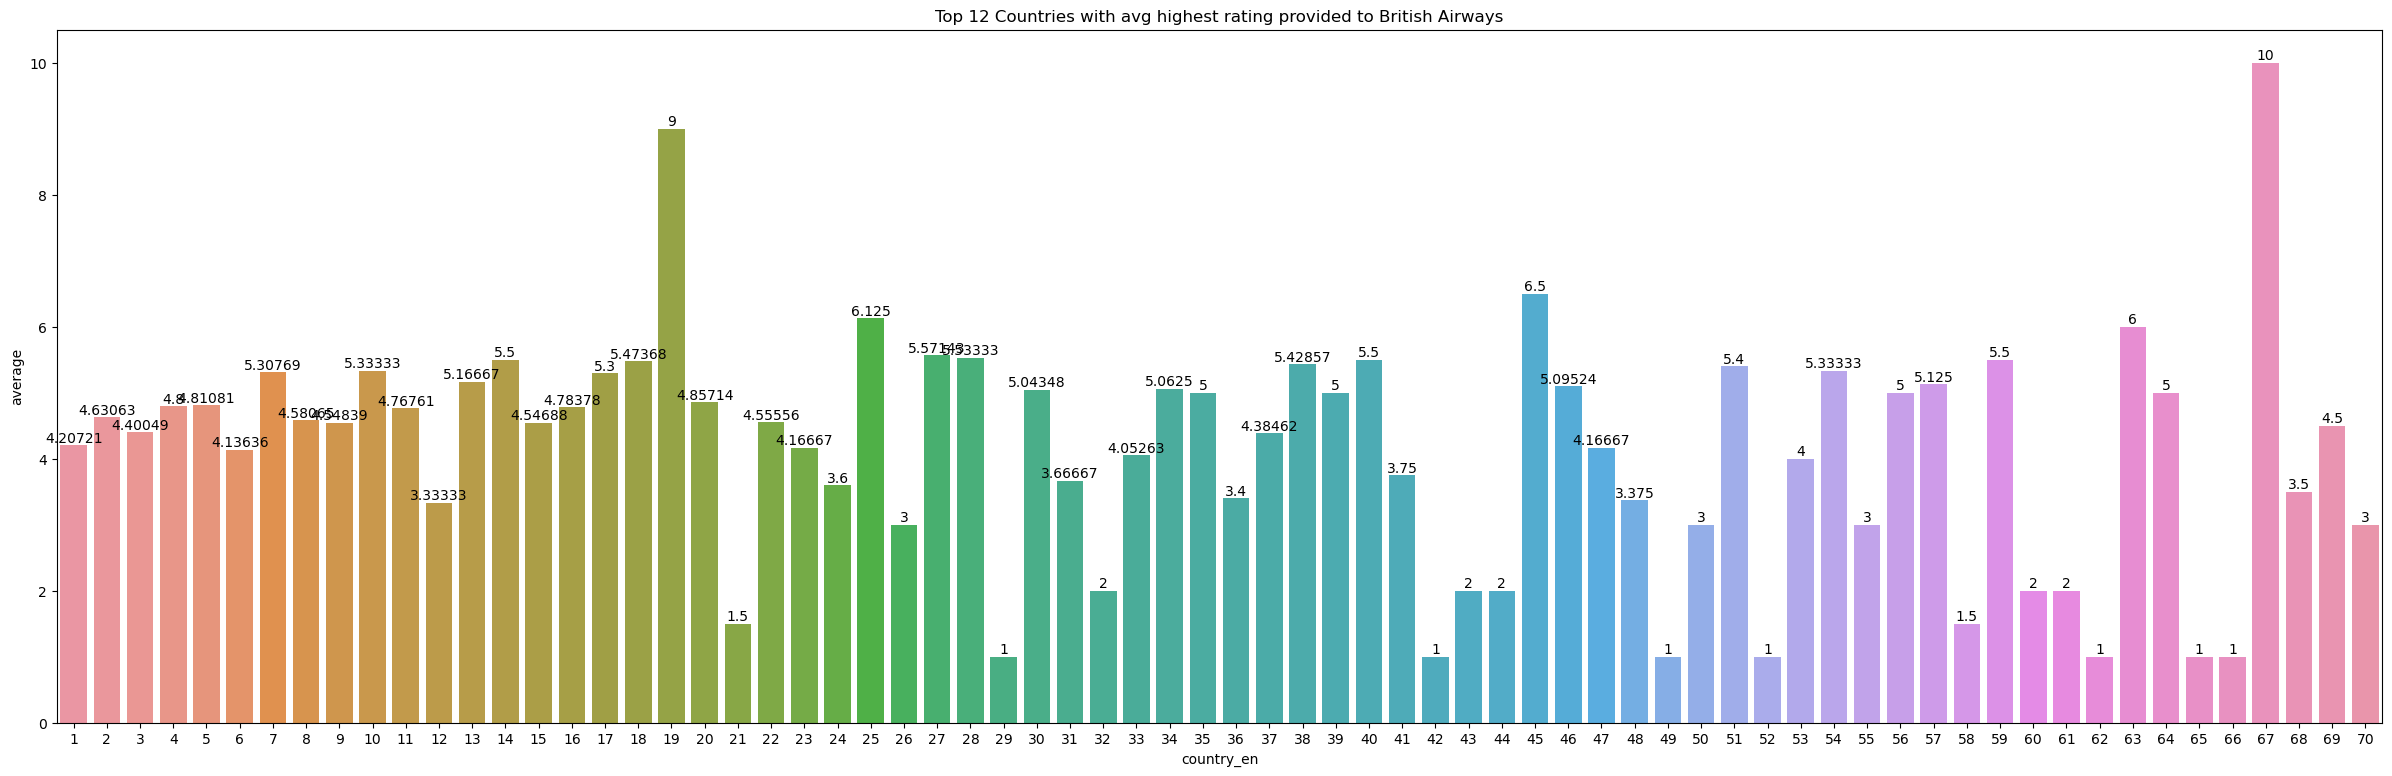

In [36]:
fig, ax = plt.subplots(figsize=(30,9))
ax1 = sns.barplot(x='country_en', y='average', data=data1[:71])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

#### Time Series Analysis

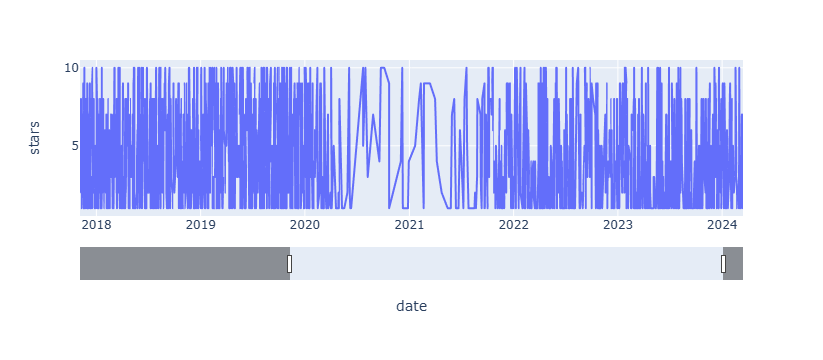

In [37]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()


It can be seen that between April 2020 to september 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.

#### word frequency (most words used)

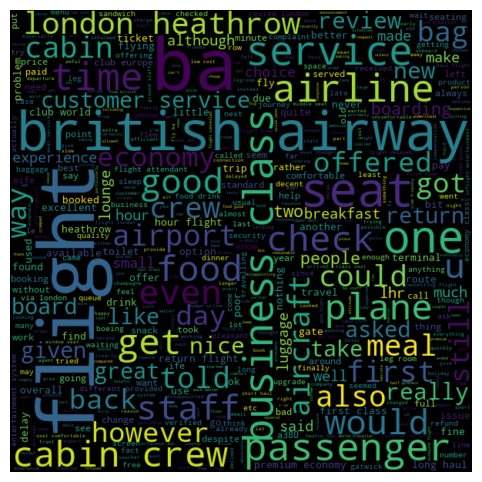

In [46]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews=" ".join(df.corpus)

plt.figure(figsize=(10,6))

stopwords = set(stopwords.words('english'))

wordcloud= WordCloud(width=600, height=600 , max_words=500 ,max_font_size=100,stopwords=stopwords ,background_color='black').generate(reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

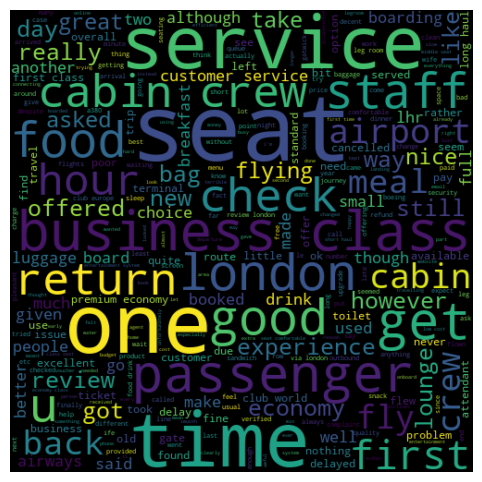

<Figure size 640x480 with 0 Axes>

In [45]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(12,6))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('Downloads/word frequency')

In [40]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review", "-", "|"])

new_words= [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))


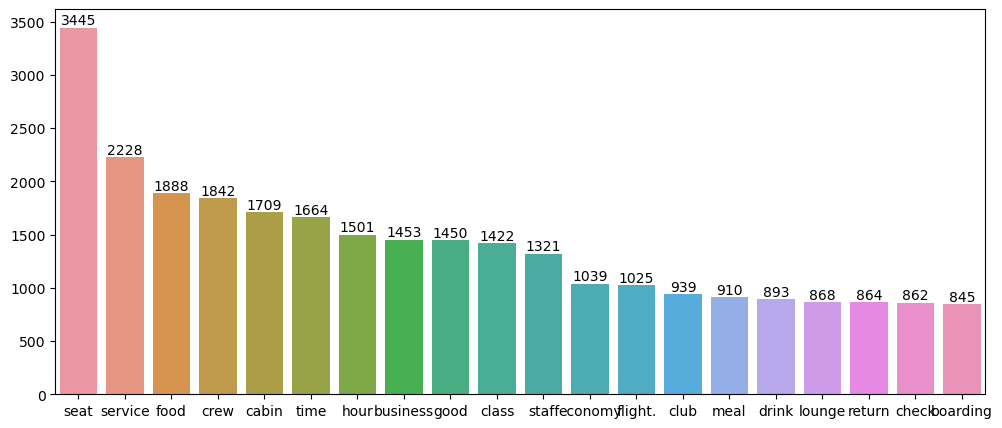

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

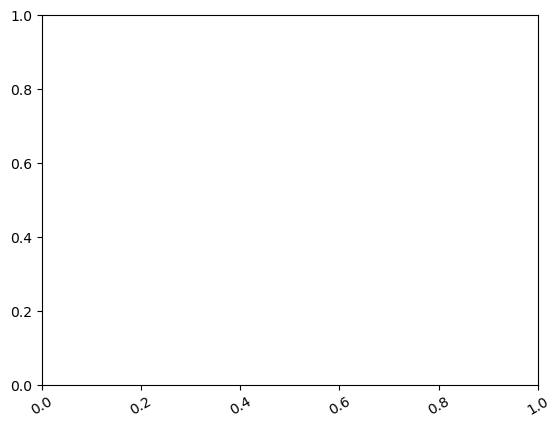

In [41]:

plt.figure(figsize=(12,5))
## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values)
all_plot.bar_label(all_plot.containers[0])
plt.show()
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service" and "food" which are all very important to customers in terms of service. 

In [42]:
df.reviews.value_counts().sum()

3498